



































































































































































































































































































































































































































































# KNN Sk-learn

In [1]:
import pandas as pd

#read in the data using pandas
df = pd.read_csv('extracted_feature/mean.csv')


#check data has been read in properly
df.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,OUTPUT
0,-409.233551,95.172421,26.971323,43.201569,13.713918,4.171072,-18.882473,-0.503872,4.714297,-9.758227,-3.357062,1.376402,0.046340,0
1,-426.106045,108.437887,38.655205,48.476645,6.066604,-1.467976,-20.591637,-4.384561,2.201416,0.651525,0.300616,-1.635982,0.274578,0
2,-344.710959,109.118703,16.926360,52.960040,-9.169425,-13.497099,5.753011,1.831713,-13.402441,1.262125,-1.593584,-3.438095,-2.307079,0
3,-653.990525,129.993846,22.854716,47.451519,19.425138,-3.519127,-15.467633,4.972797,-4.946227,-5.669412,-3.981172,-4.276103,-0.575743,0
4,-385.791611,109.202387,18.213528,27.506422,19.109799,4.671183,-21.810400,-1.416391,0.530666,-12.414120,2.228195,2.245770,-4.740436,0


In [2]:
df.shape

(240, 14)

In [3]:
# a = df['MFCC_1'][0][0:3]
# a

In [4]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['OUTPUT'])
#check that the target variable has been removed
X.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13
0,-409.233551,95.172421,26.971323,43.201569,13.713918,4.171072,-18.882473,-0.503872,4.714297,-9.758227,-3.357062,1.376402,0.046340
1,-426.106045,108.437887,38.655205,48.476645,6.066604,-1.467976,-20.591637,-4.384561,2.201416,0.651525,0.300616,-1.635982,0.274578
2,-344.710959,109.118703,16.926360,52.960040,-9.169425,-13.497099,5.753011,1.831713,-13.402441,1.262125,-1.593584,-3.438095,-2.307079
3,-653.990525,129.993846,22.854716,47.451519,19.425138,-3.519127,-15.467633,4.972797,-4.946227,-5.669412,-3.981172,-4.276103,-0.575743
4,-385.791611,109.202387,18.213528,27.506422,19.109799,4.671183,-21.810400,-1.416391,0.530666,-12.414120,2.228195,2.245770,-4.740436


In [5]:
#separate target values
y = df['OUTPUT'].values
#view target values
y[0:-1:60]


array([0, 1, 2, 3], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [8]:
# save the model to disk
import pickle

filename = 'saved_models/model_knn_mean.sav'
pickle.dump(knn, open(filename, 'wb'))

In [9]:
# load the model from disk and test accuracy
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result*100)

70.0


In [10]:
# x_min, x_max = X[0,1,0].min() - 1, X[0,1,0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
# np.arange(y_min, y_max, h))

In [11]:
#show first 5 model predictions on the test data
from sklearn.metrics import confusion_matrix
out = knn.predict(X_test)
# print(out)
# print(y_test)
print(confusion_matrix(out, y_test))

#check accuracy of our model on the test data
print(knn.score(X_test, y_test)*100)

[[14  0  0  2]
 [ 0 11  6  3]
 [ 1  2  7  0]
 [ 0  2  2 10]]
70.0


In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=4)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.58333333 0.6875     0.77083333 0.77083333 0.64583333]
cv_scores mean:0.6916666666666668


In [13]:
import pyaudio
import wave
import matplotlib.pyplot as plt

In [14]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "test.wav"

In [15]:
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")


* recording
* done recording


In [16]:
stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

In [17]:
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display


y, sr = librosa.load('test.wav')
# Play it back!
IPython.display.Audio(data=y, rate=sr)

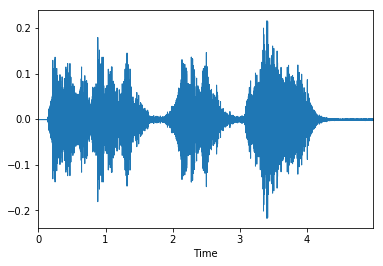

In [18]:
# Display module waveform
librosa.display.waveplot(y,sr);

In [19]:
import ast
import numpy as np

M = librosa.feature.melspectrogram(y=y, sr=sr)
# MFCC = librosa.feature.mfcc(y=y, sr=sr)
mfcc = []
mean=[]
MF = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
for i in MF:
    mfcc.append(list(i))

# m = np.mean(mfcc[0])
for j in mfcc:
    m = np.mean(j)
    mean.append(m)

In [20]:
import numpy as np
mean = np.asarray(mean, dtype=np.float32)
mean = mean.reshape(1,-1)

In [21]:
a = knn.predict(mean)
print(a)

[3]


In [22]:
# load the model from disk and test accuracy
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(mean)
print(result)

[3]


In [23]:
n_class =['sad', 'happy','angry','fear']
n_class[result[0]]

'fear'

In [24]:
error = []


# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

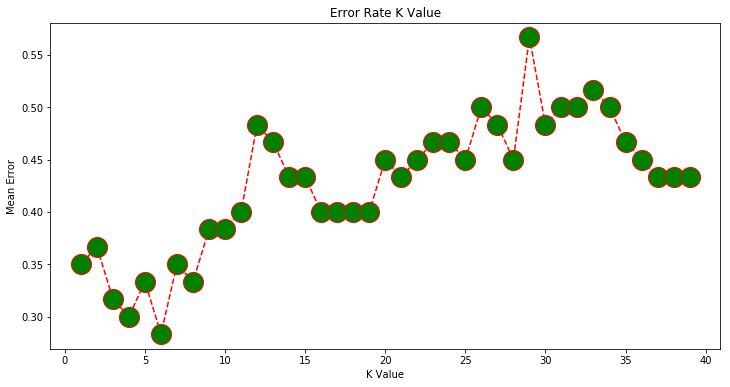

In [25]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=20)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [27]:
# plt.figure()
# sns.pairplot(df, hue = "OUTPUT")
# plt.show()

# SVM

In [28]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [29]:
#read in the data using pandas
df = pd.read_csv('extracted_feature/mean_variance.csv')


#check data has been read in properly
df.head()

,MFCC_1_m,MFCC_2_m,MFCC_3_m,MFCC_4_m,MFCC_5_m,MFCC_6_m,MFCC_7_m,MFCC_8_m,MFCC_9_m,MFCC_10_m,...,MFCC_5_v,MFCC_6_v,MFCC_7_v,MFCC_8_v,MFCC_9_v,MFCC_10_v,MFCC_11_v,MFCC_12_v,MFCC_13_v,OUTPUT
0,-409.233551,95.172421,26.971323,43.201569,13.713918,4.171072,-18.882473,-0.503872,4.714297,-9.758227,...,21.435692,17.991259,26.021020,12.520519,10.835408,18.643949,13.235517,7.805548,9.209708,0
1,-426.106045,108.437887,38.655205,48.476645,6.066604,-1.467976,-20.591637,-4.384561,2.201416,0.651525,...,28.340599,23.906879,22.447114,16.145555,14.592268,14.423561,11.498390,13.031167,11.394181,0
2,-344.710959,109.118703,16.926360,52.960040,-9.169425,-13.497099,5.753011,1.831713,-13.402441,1.262125,...,31.418348,33.311914,16.950406,14.841817,16.873424,13.823664,15.232646,11.945484,10.188937,0
3,-653.990525,129.993846,22.854716,47.451519,19.425138,-3.519127,-15.467633,4.972797,-4.946227,-5.669412,...,31.343202,30.528005,18.548183,14.440745,15.204885,14.726691,13.215731,12.434101,11.206449,0
4,-385.791611,109.202387,18.213528,27.506422,19.109799,4.671183,-21.810400,-1.416391,0.530666,-12.414120,...,22.481715,18.895808,22.967206,10.952061,12.011405,15.773593,12.719129,8.264563,9.623643,0


In [30]:
df.shape

(240, 27)

In [31]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['OUTPUT'])
#check that the target variable has been removed
print(X.head())

#separate target values
y = df['OUTPUT'].values
#view target values
y[0:-1:60]


     MFCC_1_m    MFCC_2_m   MFCC_3_m   MFCC_4_m   MFCC_5_m   MFCC_6_m  \
0 -409.233551   95.172421  26.971323  43.201569  13.713918   4.171072   
1 -426.106045  108.437887  38.655205  48.476645   6.066604  -1.467976   
2 -344.710959  109.118703  16.926360  52.960040  -9.169425 -13.497099   
3 -653.990525  129.993846  22.854716  47.451519  19.425138  -3.519127   
4 -385.791611  109.202387  18.213528  27.506422  19.109799   4.671183   

    MFCC_7_m  MFCC_8_m   MFCC_9_m  MFCC_10_m  ...   MFCC_4_v   MFCC_5_v  \
0 -18.882473 -0.503872   4.714297  -9.758227  ...  39.320672  21.435692   
1 -20.591637 -4.384561   2.201416   0.651525  ...  35.795757  28.340599   
2   5.753011  1.831713 -13.402441   1.262125  ...  37.530755  31.418348   
3 -15.467633  4.972797  -4.946227  -5.669412  ...  37.426400  31.343202   
4 -21.810400 -1.416391   0.530666 -12.414120  ...  33.901141  22.481715   

    MFCC_6_v   MFCC_7_v   MFCC_8_v   MFCC_9_v  MFCC_10_v  MFCC_11_v  \
0  17.991259  26.021020  12.520519  10.

array([0, 1, 2, 3], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [33]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly')  
svclassifier.fit(X_train, y_train)  

C:\Users\dahal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
y_pred = svclassifier.predict(X_test)  
# print(y_pred)
# print(y_test)
print(confusion_matrix(y_pred, y_test))
#check accuracy of our model on the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

[[9 1 1 1]
 [0 9 4 2]
 [0 0 7 1]
 [3 2 0 8]]


68.75

In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[9 0 0 3]
 [1 9 0 2]
 [1 4 7 0]
 [1 2 1 8]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.60      0.75      0.67        12
           2       0.88      0.58      0.70        12
           3       0.62      0.67      0.64        12

   micro avg       0.69      0.69      0.69        48
   macro avg       0.71      0.69      0.69        48
weighted avg       0.71      0.69      0.69        48



# ANN Sk-learn

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1024,504,8,4), random_state=1)
clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1024, 504, 8, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
y_pred = clf.predict(X_test)  
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[3 0 1 1 2 0 0 2 0 3 3 3 0 1 0 3 1 3 1 3 2 2 1 1 2 2 1 1 2 2 2 3 0 0 3 0 2
 1 1 3 0 2 0 1 3 3 0 2]


In [38]:
#check accuracy of our model on the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

25.0

In [39]:
# save the model to disk
import pickle

filename = 'saved_models/skmodel_ann_mean.sav'
# pickle.dump(knn, open(filename, 'wb'))

In [40]:
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display


y, sr = librosa.load('test.wav')
# Play it back!
IPython.display.Audio(data=y, rate=sr)

In [41]:
import ast
import numpy as np

M = librosa.feature.melspectrogram(y=y, sr=sr)
# MFCC = librosa.feature.mfcc(y=y, sr=sr)
mfcc = []
mean=[]
MF = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
for i in MF:
    mfcc.append(list(i))

# m = np.mean(mfcc[0])
for j in mfcc:
    m = np.mean(j)
    mean.append(m)

In [42]:
import numpy as np
mean = np.asarray(mean, dtype=np.float32)
mean = mean.reshape(1,-1)

In [43]:
# load the model from disk and test accuracy
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.predict(mean)
result = result[0]
print(result)

n_class =['sad', 'happy','angry','fear']
print(n_class[result])

1
happy


#  Decision Tree

In [44]:
# from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# my_classifier = tree.DecisionTreeClassifier()
my_classifier = KNeighborsClassifier()

my_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
predictions = my_classifier.predict(X_test)
print(predictions)
print(y_test)

[0 0 2 1 2 0 0 2 0 3 1 3 0 2 0 3 1 3 1 3 2 1 3 1 2 2 1 1 2 2 1 0 0 0 3 0 2
 1 3 0 0 1 0 1 3 3 0 2]
[3 0 1 1 2 0 0 2 0 3 3 3 0 1 0 3 1 3 1 3 2 2 1 1 2 2 1 1 2 2 2 3 0 0 3 0 2
 1 1 3 0 2 0 1 3 3 0 2]


In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print(accuracy_score(y_test, predictions)*100)

77.08333333333334


---
# Tensorflow ANN

In [49]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
#read in the data using pandas
df = pd.read_csv('extracted_feature/mean_variance.csv')

#check data has been read in properly
df.head()

,MFCC_1_m,MFCC_2_m,MFCC_3_m,MFCC_4_m,MFCC_5_m,MFCC_6_m,MFCC_7_m,MFCC_8_m,MFCC_9_m,MFCC_10_m,...,MFCC_5_v,MFCC_6_v,MFCC_7_v,MFCC_8_v,MFCC_9_v,MFCC_10_v,MFCC_11_v,MFCC_12_v,MFCC_13_v,OUTPUT
0,-409.233551,95.172421,26.971323,43.201569,13.713918,4.171072,-18.882473,-0.503872,4.714297,-9.758227,...,21.435692,17.991259,26.021020,12.520519,10.835408,18.643949,13.235517,7.805548,9.209708,0
1,-426.106045,108.437887,38.655205,48.476645,6.066604,-1.467976,-20.591637,-4.384561,2.201416,0.651525,...,28.340599,23.906879,22.447114,16.145555,14.592268,14.423561,11.498390,13.031167,11.394181,0
2,-344.710959,109.118703,16.926360,52.960040,-9.169425,-13.497099,5.753011,1.831713,-13.402441,1.262125,...,31.418348,33.311914,16.950406,14.841817,16.873424,13.823664,15.232646,11.945484,10.188937,0
3,-653.990525,129.993846,22.854716,47.451519,19.425138,-3.519127,-15.467633,4.972797,-4.946227,-5.669412,...,31.343202,30.528005,18.548183,14.440745,15.204885,14.726691,13.215731,12.434101,11.206449,0
4,-385.791611,109.202387,18.213528,27.506422,19.109799,4.671183,-21.810400,-1.416391,0.530666,-12.414120,...,22.481715,18.895808,22.967206,10.952061,12.011405,15.773593,12.719129,8.264563,9.623643,0


In [51]:
df.shape

(240, 27)

In [52]:
X = df.drop(columns=['OUTPUT'])
X.head()

,MFCC_1_m,MFCC_2_m,MFCC_3_m,MFCC_4_m,MFCC_5_m,MFCC_6_m,MFCC_7_m,MFCC_8_m,MFCC_9_m,MFCC_10_m,...,MFCC_4_v,MFCC_5_v,MFCC_6_v,MFCC_7_v,MFCC_8_v,MFCC_9_v,MFCC_10_v,MFCC_11_v,MFCC_12_v,MFCC_13_v
0,-409.233551,95.172421,26.971323,43.201569,13.713918,4.171072,-18.882473,-0.503872,4.714297,-9.758227,...,39.320672,21.435692,17.991259,26.021020,12.520519,10.835408,18.643949,13.235517,7.805548,9.209708
1,-426.106045,108.437887,38.655205,48.476645,6.066604,-1.467976,-20.591637,-4.384561,2.201416,0.651525,...,35.795757,28.340599,23.906879,22.447114,16.145555,14.592268,14.423561,11.498390,13.031167,11.394181
2,-344.710959,109.118703,16.926360,52.960040,-9.169425,-13.497099,5.753011,1.831713,-13.402441,1.262125,...,37.530755,31.418348,33.311914,16.950406,14.841817,16.873424,13.823664,15.232646,11.945484,10.188937
3,-653.990525,129.993846,22.854716,47.451519,19.425138,-3.519127,-15.467633,4.972797,-4.946227,-5.669412,...,37.426400,31.343202,30.528005,18.548183,14.440745,15.204885,14.726691,13.215731,12.434101,11.206449
4,-385.791611,109.202387,18.213528,27.506422,19.109799,4.671183,-21.810400,-1.416391,0.530666,-12.414120,...,33.901141,22.481715,18.895808,22.967206,10.952061,12.011405,15.773593,12.719129,8.264563,9.623643


In [53]:
y = df['OUTPUT'].values
#view target values
y[0:-1:60]

array([0, 1, 2, 3], dtype=int64)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)


In [55]:
class_names=['sad','happy','angry','fear']

In [56]:
X_train.shape

(168, 26)

In [57]:
len(y_train)

168

In [58]:
y_train

array([0, 2, 2, 2, 2, 1, 0, 2, 3, 0, 1, 3, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1,
       3, 0, 2, 0, 2, 1, 2, 3, 0, 1, 1, 3, 1, 0, 0, 1, 1, 3, 3, 3, 0, 0,
       1, 0, 0, 2, 2, 3, 2, 3, 3, 0, 3, 0, 3, 3, 2, 2, 1, 3, 1, 0, 3, 3,
       2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 0, 2, 0, 1, 1, 2, 3,
       3, 2, 0, 1, 3, 3, 2, 1, 0, 3, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 3, 0,
       2, 1, 2, 3, 0, 0, 1, 3, 1, 3, 1, 3, 1, 2, 1, 0, 2, 1, 0, 0, 3, 2,
       2, 1, 2, 0, 3, 0, 3, 0, 2, 1, 1, 1, 0, 3, 1, 1, 3, 1, 2, 2, 1, 1,
       3, 2, 0, 3, 0, 2, 0, 2, 1, 3, 2, 3, 0, 3], dtype=int64)

In [59]:
print(y_train.shape)
print(len(y_test))
print(y_test)

(168,)
72
[0 1 0 3 3 2 2 1 3 0 0 2 1 0 3 0 1 0 2 3 2 3 3 3 2 2 1 1 1 3 2 1 1 2 0 3 2
 0 1 0 0 3 3 3 0 1 3 3 0 3 2 0 0 1 2 0 1 0 2 3 3 1 2 2 2 1 1 1 2 1 0 2]


In [60]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam, sgd
from keras.metrics import categorical_crossentropy


model = Sequential([
    Dense(1024, input_shape=(26,),activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])




# model = Sequential([
#     Dense(56, input_shape=(26,),activation='relu'),
# #     Dense(26, activation='relu'),
#     Dense(26, activation='relu'),
#     Dense(13, activation='relu'),
#     Dense(4, activation='softmax')
# ])




# ----------------------- Old below ------------------

# model = keras.Sequential()
# model.add(Dense(13, input_dim=13, name='dense_1'))  # will be loaded

# # model.add(keras.layers.Dense(13, input_shape=(13,)))
# model.add(keras.layers.Dense(13))
# model.add(keras.layers.Dense(8))
# model.add(keras.layers.Dense(4))

# tensorboard = TensorBoard(log_dir='log/{}'.format(time()))


Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              27648     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 516       
Total params: 618,628
Trainable params: 618,628
Non-trainable params: 0
_________________________________________________________________


In [62]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd, 
              metrics=['accuracy'])



# model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['accuracy'])

In [77]:
model.fit(X_train, y_train, epochs=500, batch_size=84, validation_data=(X_test,y_test))

Train on 168 samples, validate on 72 samples
Epoch 1/500
168/168 [==============================] - 0s 113us/step - loss: 0.4485 - acc: 0.8750 - val_loss: 0.6100 - val_acc: 0.7361
Epoch 2/500
168/168 [==============================] - 0s 113us/step - loss: 0.4522 - acc: 0.8631 - val_loss: 0.6019 - val_acc: 0.7083
Epoch 3/500
168/168 [==============================] - 0s 95us/step - loss: 0.4449 - acc: 0.8631 - val_loss: 0.5994 - val_acc: 0.7222
Epoch 4/500
168/168 [==============================] - 0s 113us/step - loss: 0.4558 - acc: 0.8631 - val_loss: 0.6059 - val_acc: 0.7222
Epoch 5/500
168/168 [==============================] - 0s 101us/step - loss: 0.4635 - acc: 0.8333 - val_loss: 0.6104 - val_acc: 0.7500
Epoch 6/500
168/168 [==============================] - 0s 101us/step - loss: 0.4556 - acc: 0.8452 - val_loss: 0.6106 - val_acc: 0.7500
Epoch 7/500
168/168 [==============================] - 0s 113us/step - loss: 0.4502 - acc: 0.8631 - val_loss: 0.6069 - val_acc: 0.7222
Epoch 8/500

In [64]:
# tensorboard

In [65]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc*100)

72/72 [==============================] - 0s 55us/step
Test accuracy: 70.83333333333334


In [66]:
from keras.models import load_model

fileName = 'saved_models/keras_model_ann_mean.h5'
model.save(fileName)  # creates a HDF5 file 'my_model.h5'

# deletes the existing model
# del model  


In [67]:
# returns a compiled model
# identical to the previous one
from keras.initializers import glorot_uniform
from keras.utils import CustomObjectScope

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        pk = load_model(fileName)
# pk = load_model(fileName)
json_string = pk.to_json()

In [68]:
predictions = pk.predict(X_test)
# print(X_test)
print(predictions)


[[8.21491897e-01 3.86259928e-02 9.63707268e-02 4.35113646e-02]
 [1.41929746e-01 2.37473935e-01 4.49857116e-01 1.70739174e-01]
 [8.22063982e-01 4.99796458e-02 5.22961169e-02 7.56602138e-02]
 [1.02325954e-01 2.03493834e-01 3.40065032e-01 3.54115188e-01]
 [2.18578167e-02 2.05027387e-01 1.95730135e-01 5.77384651e-01]
 [3.77806336e-01 8.26544240e-02 3.07924241e-01 2.31614932e-01]
 [1.87034009e-03 3.41636747e-01 6.21524215e-01 3.49686556e-02]
 [1.02183655e-01 2.68289238e-01 3.92577618e-01 2.36949429e-01]
 [3.27471038e-03 2.65844792e-01 2.44581848e-01 4.86298710e-01]
 [7.11062312e-01 8.50740001e-02 1.58559307e-01 4.53043953e-02]
 [8.82602215e-01 1.37318000e-02 5.85117042e-02 4.51541841e-02]
 [2.60094122e-04 2.26865396e-01 6.34943783e-01 1.37930721e-01]
 [3.26724094e-03 6.14223182e-01 2.62906641e-01 1.19602948e-01]
 [9.57789302e-01 7.48497341e-03 2.06819549e-02 1.40436972e-02]
 [3.99938673e-01 2.14520127e-01 1.62581280e-01 2.22959951e-01]
 [9.88457024e-01 1.66797498e-03 6.55907905e-03 3.315965

In [69]:
# predictions

In [70]:
out = np.argmax(predictions[-1])
print(class_names[out])
p = y_test[-1]
print(class_names[p])

happy
angry


# 

In [71]:
# Testing new

In [72]:
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display


y, sr = librosa.load('test.wav')
# Play it back!
IPython.display.Audio(data=y, rate=sr)

In [73]:
import ast
import numpy as np

M = librosa.feature.melspectrogram(y=y, sr=sr)
# MFCC = librosa.feature.mfcc(y=y, sr=sr)
mfcc = []
mean=[]
MF = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
for i in MF:
    mfcc.append(list(i))

# m = np.mean(mfcc[0])
for j in mfcc:
    m = np.mean(j)
    mean.append(m)

In [75]:
# import numpy as np
# mean = np.asarray(mean, dtype=np.float32)
# # mean.shape
# model.predict(mean)